<center>
    <H1> Introduction à  </H1>
<img src="julia_banner_small.png" width="500"/>
    <H2> Marc Fuentes - SED B2B </H2> 
</center>


## Plan de l'exposé

- Encore un autre langage pour le calcul 🙄
- Aspects Fonctionnels
- Types
- Multiméthodes (Multiple Dispatch)
- Parallélisme
- Environnement
- Interfaces

## Encore un autre langage pour le calcul 🙄
- En 1957 naquit le ForTran (standards 66, 77, 95, 03, 08)
- Langages specialisés ou de script
  - Matlab 1984 (clone libre $\rightarrow$ GNU Octave 1993) : algèbre linéaire
  - Mathematica 1988 : calcul symbolique 
  - Scilab 1994 (INRIA 💪)
  - R 1993 (descendant de S 1975) : orienté stastitiques
  - Numpy/Scipy/Matplotlib pour Python 1995 
  - Sage 2005 (orienté calcul formel)
  - Julia 2012

# Problème des 2 langages 

- compromis expressivité _vs_ efficacité
- langages de scripts (Python, R, Matlab) : 
  - rapidité de développement, facilité de tests 😀
  - lenteur à l'exécution  😒
- langages compilés (C/C++, Fortran, Rust, D)
   - exécution rapide 😀 (compilé en machine)
   - moindre expressivité  $\rightarrow$  développement plus lent (déverminage)
- Julia presente les avantages des 2 aspects : 
  - exécution rapide avec puissance d'expressivité

## Sauvez la planète : Mangez un banquier 😜 ou 
|<img src="zwart1_g.png" width=400 /> | <img src="zwart2_g.png" width=400> |
|:--:| :--:|
| In "The Ecological Impact of High-performance Computing in Astrophysics" S. Zwart. (Nature Astronony (2020) | $\Rightarrow$ ... For the environment is to abandon Python for a more environmentally friendly  (compiled) programming language. |

... But there are other interesting strongly-typed languages with
characteristics similar to Python, such as Alice, Julia, Rust, and Swift.

## ... codez en Julia
| ![paugier](paugier_zwart.png) |
| :--: |
| "Reducing the ecological impact of computing through education and Python compilers", Nature Astronomy, P. Augier et al (2021) |

<center>
    <H2> micro-tests généraux </H2>
<img src="julia_benchmarks.svg" width="900"/>
tirés de https://julialang.org   
</center>

## Un langage conçu pour les calculs

- Prise-en-charge des tableaux multidimensionnels (à la Fortran), avec tranches et indexation et réplication

In [1]:
A = (1:3) .* (1:3)' # broadcast (replication)
A[2,:] = ones(3)'
A[3,1:2] .= 8
A[1, [3, 2, 1]] = [2 2 2]
(A, A * [1:3;], A[:]) # Fortan order

([2 2 2; 1 1 1; 8 8 9], [12, 6, 51], [2, 1, 8, 2, 1, 8, 2, 1, 9])

## Un langage conçu pour les calculs

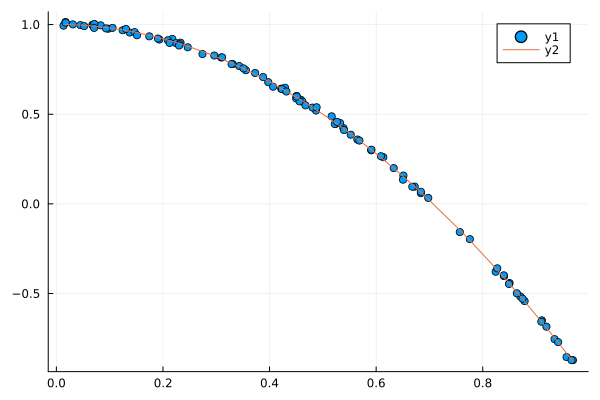

In [2]:
using Plots
N = 100;
x = rand(N)
y = -2 .* x.^2 .+ 1 + 0.01 * randn(N)
α, β, γ = [x.^2 x ones(N)] \ y # pseudo inverse par moindres carrés
scatter(x,y); xₛ = sort(x); plot!(xₛ,α .* xₛ.^2 + β .* xₛ .+ γ)

## Un langage conçu pour les calculs
- compilateur à la volée vers le code machine (llvm) : boucles ausssi rapides que le vectoriel

In [3]:
using LinearAlgebra, Test
function f1(n)
    A=zeros(Int64, n,n);
    for j=1:n 
        for i=1:n
            A[i,j] = i^j
        end
    end
    return A
end    
@elapsed f1(10^4)

1.42682404

In [4]:
f2(n) = [1:n;].^[1:n;]'
@test f1(3) == f2(3)
@elapsed f2(10^4)

1.447940552

In [5]:
@code_native sum(1:10)

	.text
	.file	"sum"
	.globl	julia_sum_19710                 # -- Begin function julia_sum_19710
	.p2align	4, 0x90
	.type	julia_sum_19710,@function
julia_sum_19710:                        # @julia_sum_19710
; Function Signature: sum(Base.UnitRange{Int64})
; ┌ @ range.jl:1405 within `sum`
# %bb.0:                                # %top
	#DEBUG_VALUE: sum:r <- [DW_OP_deref] [$rdi+0]
	push	rbp
	mov	rbp, rsp
; │ @ range.jl:1406 within `sum`
; │┌ @ range.jl:768 within `length`
; ││┌ @ int.jl:86 within `-`
	mov	rcx, qword ptr [rdi]
	mov	rdx, qword ptr [rdi + 8]
	sub	rdx, rcx
; ││└
; ││┌ @ int.jl:87 within `+`
	lea	rax, [rdx + 1]
; │└└
; │ @ range.jl:1408 within `sum`
	mov	rsi, rax
	sar	rsi
	imul	rsi, rdx
	sar	rdx
	imul	rdx, rax
; │┌ @ int.jl:137 within `iseven`
; ││┌ @ number.jl:42 within `iszero`
; │││┌ @ promotion.jl:639 within `==`
	test	al, 1
; │└└└
	cmove	rdx, rsi
; │┌ @ int.jl:88 within `*`
	imul	rax, rcx
; │└
; │┌ @ int.jl:87 within `+`
	add	rax, rdx
; │└
	pop	rbp
	ret
.Lfunc_end0:
	.si

## Aspects Fonctionnels
- Fonctions anonymes : `(x -> x*x)(2) `
- fonctions avec nombre variables d'arguments et optionnel (valeurs par défaut et mot-clefs)
- fonctions ne sont pas censées faire d'effet de bord (exceptées celles dont le nom fini par `!`)

In [6]:
function moy(x, y=one(x); add = true)
  let (f,f⁻¹) = (!add ? (log, exp) : (x->x, x->x))
     f⁻¹((f(x)+f(y))/(2*one(x)))
  end 
end
(moy(1//2), moy(4 ; add=false))

(3//4, 2.0)

### Aspects Fonctionnels
- Listes définies en compréhension `[ i^2 for i=1:10 ]`

In [7]:
hilbert(n::Int) = reshape([ 1//(i+j-1) for i=1:n for j=1:n],n,n)
H₃=hilbert(3) 
det(H₃)

1//2160

### Aspects Fonctionnels
- fonctions `map`, `reduce` et `filter`

In [8]:
# on cherche les nombres parfaits entre 1 et 100
supSquares = filter(x->abs(√(x-1)-round(√(x-1))) < 1e-12, 1:100)
infCubes = filter(x->abs(∛(x+1)-round(∛(x+1))) < 1e-12, 1:100)
ξ = intersect(supSquares, infCubes)

1-element Vector{Int64}:
 26

### Aspects Fonctionnels
- Métaprogrammation: homoiconicité, le code c'est de la donné $\rightarrow$ puissant mais dangereux
- les macros (commençant par `@`) utilise ce mecanisme

In [9]:
z = :truc
a = "1+truc"; b = Meta.parse(a); 
truc = 2
(a, b, eval(b))

("1+truc", :(1 + truc), 3)

## Types
 - Julia utilise un systeme de typage dynamique 
 - avec une hiérarchie de types définis comme un arbre dont `Any` est la racine
 - Les types concrets sont des feuilles de l'arbre

In [10]:
subtypes(Real)

7-element Vector{Any}:
 AbstractFloat
 AbstractIrrational
 FixedPointNumbers.FixedPoint
 Integer
 Rational
 StatsBase.PValue
 StatsBase.TestStat

- `x<:y` exprime la relation "x est un sous-type de y"

In [11]:
Int64 <: Real

true

### Types : abstraits et concrets 
- certains types sont abstraits (e.g `Real`) et ne peuvent être instantiés

In [12]:
typeof(Real(1.2))

Float64

d'autres types sont concrets (e.g. `Int64`) : ils n'ont pas de sous-type excepté `Union{}`

In [13]:
subtypes(Int64)

Type[]

In [14]:
Union{}<:Int64

true

In [15]:
s = Float64; while (s != Any) print("$s -> "); s=supertype(s); end ; print(Any)

Float64 -> AbstractFloat -> Real -> Number -> Any

### Types composés  
- Types composés a l'aide `struct` and `mutable struct`

In [16]:
struct zutos
    x::Int
    a::Array{Int64,1}
end 
w = zutos(2, [1,2])

zutos(2, [1, 2])

In [17]:
w.x = 4;

LoadError: setfield!: immutable struct of type zutos cannot be changed

In [18]:
append!(w.a,3)'

1×3 adjoint(::Vector{Int64}) with eltype Int64:
 1  2  3

### Types : n-uplets et unions

In [19]:
typeof((3,"haha"))

Tuple{Int64, String}

In [20]:
Tuple{Int64,String} <: Tuple{Real,String}

true

In [21]:
Real <: Union{String, Real}

true

### Types  paramétrés

In [22]:
struct tableau{T<:Number}
    n::Int64
    a::Ptr{T}
end
a = tableau{Int64}(10, 0)

tableau{Int64}(10, Ptr{Int64} @0x0000000000000000)

### ☢ Par souci d'efficacité,les types paramétrés sont invariants ☢ , par exemple

In [23]:
Array{Int64} <: Array{Real}

false

## Fonctions : définition

In [24]:
g1 = x-> x * x # definition par λ-fonction
g2(x) = x * x # definition en ligne
function g3(x) # definition multi-ligne
   x * x # on peut aussi faire return x*x
end
tuple(eval.(Meta.parse.("g".* string.(1:3) .* "(2)"))...) # comme (g1(2),g2(2),g3(2))

(4, 4, 4)

## Fonctions : annotation de type

In [25]:
carre(x) = x * x
(carre(4),carre(-1.2), carre("hehe"))

(16, 1.44, "hehehehe")

In [26]:
cube(x::String) = x * x *x
cube("hehe")

"hehehehehehe"

In [27]:
cube(2)

LoadError: MethodError: no method matching cube(::Int64)
The function `cube` exists, but no method is defined for this combination of argument types.

[0mClosest candidates are:
[0m  cube([91m::String[39m)
[0m[90m   @[39m [35mMain[39m [90m[4mIn[26]:1[24m[39m


## Fonctions :  documentation et tests

In [28]:
"""
resout_tout(x) -> cette fonction résout l'equation de l'univers
"""
function resout_tout(x)
    42
end    

resout_tout

In [29]:
?resout_tout

search: resout_tout redirect_stdout



resout_tout(x) -> cette fonction résout l'equation de l'univers


In [30]:
using Test 
@test resout_tout(:univers) == 42

Test Passed

In [31]:
@test resout_tout(-1) == 43

Test Failed at In[31]:1
  Expression: resout_tout(-1) == 43
   Evaluated: 42 == 43



LoadError: [91mThere was an error during testing[39m

## Fonctions : genericité
- en utilisant des types paramétrés on peut créer des fonctions paramétrés

In [32]:
w3(x::T, N::Int64) where {T<:Number} = reduce(*,fill(x,N))
w3(3., 3)

27.0

## Multiméthodes (Multiple Dispatch)

In [33]:
f(x::String,y::String) = x * y
f(x::Int64, y::String) = repeat(y,x)
f(x::String,y::Int64) = f(y, x)
f(x::Union{Float64,Int64}, y::Union{Float64, Int64}) = x + y
f(x::Float64,y::String) =  let (e,p) = (Int64(floor(x)), x-floor(x)); repeat(y, e)*y[1:Int64(floor(p*length(y)))] end
f(x::String, y::Float64) = f(y,x)
(f("abc", 2.7), f(2,4.4), f("h","u"))

("abcabcab", 6.4, "hu")

|<img src="Art_of_Dispatch.png" width="500">|
|:--:|
|extrait de [the Art of Multiple Dispatch (Matthijs Cox)](https://scientificcoder.com/the-art-of-multiple-dispatch) |


## Parallélisme
Julia gère le parallélisme de différentes façons
- parallélisme distribué "natif" : Distributed.jl
- parallélisme à mémoire partagée "natif":  `@threads`
- MPI : paquet MPI.jl 
- GPU $\Rightarrow$ GPU.jl, CUDA.jl, AMD.jl

### Parallélisme distribué : bas niveau

In [34]:
using Distributed
addprocs(7)

7-element Vector{Int64}:
 2
 3
 4
 5
 6
 7
 8

In [35]:
res1 = @spawnat 2 sum(rand(1000,1000).^2)
res2= @spawnat 3 sum(rand(1000,1000).^2)
fetch(res1)+fetch(res2)

666863.9950832839

## macros haut niveau

In [36]:
@everywhere function f3(n::Int)
res = @distributed (+) for i=1:n
      sin(i*π/n)
end
return res
end
@time f3(200000000)

  1.447494 seconds (320.33 k allocations: 15.818 MiB, 11.27% compilation time)


1.2732395447351988e8

In [37]:
function f4(n::Int)
res =  0
for i=1:n
  res += sin(i*π/n)
end
return res
end
@time f4(200000000)

  2.540945 seconds


1.2732395447358306e8

## Parallélisme  : `pmap`

In [38]:
@everywhere using Statistics
@everywhere function cost_mean(x)
   s = zero(eltype(x))
   for i = 1:100
      s += mean(log(sin(exp(xi))) for xi in x)
   end
   return s
end
X = [rand(100_000) for j=1:20];
t1 = @elapsed map(cost_mean, X)
t2 = @elapsed pmap(cost_mean, X)
println("$t1, $t2")

6.698908857, 1.839682674


## Parallélisme  :  `@threads`

In [39]:
using BenchmarkTools
f(x) = sin(x) + cos(x)
function serial(n)
    s = 0.0
    for x = 1:n
        s += f(x)
    end
    return s
end
@benchmark serial(1<<22)

BenchmarkTools.Trial: 25 samples with 1 evaluation.
 Range (min … max):  203.890 ms … 209.850 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     205.291 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   205.808 ms ±   1.296 ms  ┊ GC (mean ± σ):  0.00% ± 0.00%

                █                                                
  ▃▁▁▁▁▁▃▁▁▁▁▁▁██▅▃▁▁▁▁▁▁▁▁▁▁▃▃▁▁▁▁▁▃▁▁▁▁▃▁▁▁▁▁▁▁▃▁▁▁▁▁▁▁▁▁▁▁▁▃ ▁
  204 ms           Histogram: frequency by time          210 ms <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [40]:
using Base.Threads # ne pas oublier `export JULIA_NUM_THREADS=8`
using Test
function threads(n)
    res_vec = zeros(nthreads())
    @threads for i ∈ 1:nthreads()
        res_vec[i] = local_sum(threadid(), n, nthreads())
    end
    sum(res_vec)
end

function local_sum(id, n, nthread)
    out = 0.0
    for x = 1+n*(id-1)÷nthread:n*id÷nthread 
        out += f(x)
    end
    out
end

@test threads(100) ≈ serial(100) 
@benchmark threads(2<<22)

BenchmarkTools.Trial: 79 samples with 1 evaluation.
 Range (min … max):  59.775 ms … 94.024 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     60.572 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   63.570 ms ±  8.429 ms  ┊ GC (mean ± σ):  0.00% ± 0.00%

  █▇                                                           
  ██▇▇▁▁▃▁▄▃▃▁▁▁▁▁▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃▁▁▁▁▃▁▁▄ ▁
  59.8 ms         Histogram: frequency by time        90.5 ms <

 Memory estimate: 4.38 KiB, allocs estimate: 44.

### Parallélisme : GPU

In [41]:
N = 32*(1<<5) # version CPU
A = [1:N;]; B = [0:N-1;];
@benchmark z = sum(A*A')

BenchmarkTools.Trial: 3658 samples with 1 evaluation.
 Range (min … max):  847.172 μs …   2.973 ms  ┊ GC (min … max):  0.00% … 42.54%
 Time  (median):       1.019 ms               ┊ GC (median):     0.00%
 Time  (mean ± σ):     1.362 ms ± 570.968 μs  ┊ GC (mean ± σ):  17.37% ± 19.49%

   ▁▆█▂                                                          
  ▃████▇▅▄▃▃▃▂▂▂▃▃▃▄▄▃▃▄▅▃▂▂▃▂▂▂▁▂▂▁▂▂▂▂▂▂▂▂▂▃▃▃▄▃▃▃▃▃▃▄▅▃▂▂▂▂▂ ▃
  847 μs           Histogram: frequency by time         2.67 ms <

 Memory estimate: 8.00 MiB, allocs estimate: 5.

### Parallélisme : GPU

In [42]:
using CUDA # version GPU
A = CuArray([1:N;]); B = CuArray([0:N-1;]);
@benchmark z = sum(A*A')

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  150.770 μs …   3.419 ms  ┊ GC (min … max): 0.00% … 48.01%
 Time  (median):     153.429 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   161.679 μs ± 150.051 μs  ┊ GC (mean ± σ):  2.53% ±  2.59%

            ▁▃▄▅▇█▇█▆▆▅▃▁                                        
  ▁▁▁▁▂▂▃▄▇███████████████▇▆▅▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▃
  151 μs           Histogram: frequency by time          160 μs <

 Memory estimate: 3.25 KiB, allocs estimate: 147.

### Parallélisme : MPI

In [43]:
using MPIClusterManagers, Distributed
manager = MPIWorkerManager(4);
addprocs(manager);
@everywhere import MPI
@mpi_do manager begin
    comm = MPI.COMM_WORLD;p = MPI.Comm_size(comm);r = MPI.Comm_rank(comm)
    s_loc=sum(1+r* 100/p:100/p * (r+1)); s=MPI.Allreduce(s_loc, +, comm)
    println("s=$s")
end

      From worker 10:	s=5050.0
      From worker 12:	s=5050.0
      From worker 9:	s=5050.0
      From worker 11:	s=5050.0


## Extensibilité
- Les possibilités d'extension de Julia sont énormes grâce a son gestionnaire de paquets
   - IPA : `Pkg.add("MyPackage")`, `Pkg.update`, `Pkg.remove`, etc...
   - en mode interactif : pressez `]` et utiliser les même commandes de l'IPA
   - on peut selectionner une version de paquet avec `add mon_paquet@version`
- Après le paquet est disponible grace a la commande `using MyPackage`
<center>
<img src="pkgmgr2.png" width="400">   
</center>   

## Extensibilité
 - On peut appeler facilement des fonctions `C` ou `Fortran` depuis Julia

In [44]:
io = open("skel.c","w")
write(io, "int ajoute2(int x) { return x+2; }")
close(io)
run(`gcc -o ajoute2.so --shared skel.c`);
w = ccall((:ajoute2, "./ajoute2.so"), Int32, (Int32,), 12)
run(`rm ajoute2.so skel.c`)
println("w = $w")

w = 14


## Conclusion : 
- Julia est un des meilleurs «langages de script» pour faire du numérique
- Le sens de l'histoire : Matlab $\Rightarrow$ Python $\Rightarrow$ Julia 
- En France, [Pierre Navaro](https://pnavaro.github.io/NouvellesJulia) a une niouzelettre sur Julia